# Load the Taiwan Credit Card Dataset

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("UCI_Credit_Card.csv")
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# Get the column names of the dataset
columns = df.columns
print(columns)


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


In [5]:
# Loop through all columns and get value counts
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n" + "-"*50 + "\n")


Value counts for ID:
ID
1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: count, Length: 30000, dtype: int64

--------------------------------------------------

Value counts for LIMIT_BAL:
LIMIT_BAL
50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
             ... 
730000.0        2
1000000.0       1
327680.0        1
760000.0        1
690000.0        1
Name: count, Length: 81, dtype: int64

--------------------------------------------------

Value counts for SEX:
SEX
2    18112
1    11888
Name: count, dtype: int64

--------------------------------------------------

Value counts for EDUCATION:
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

--------------------------------------------------

Value counts for MARRIAGE:
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

------

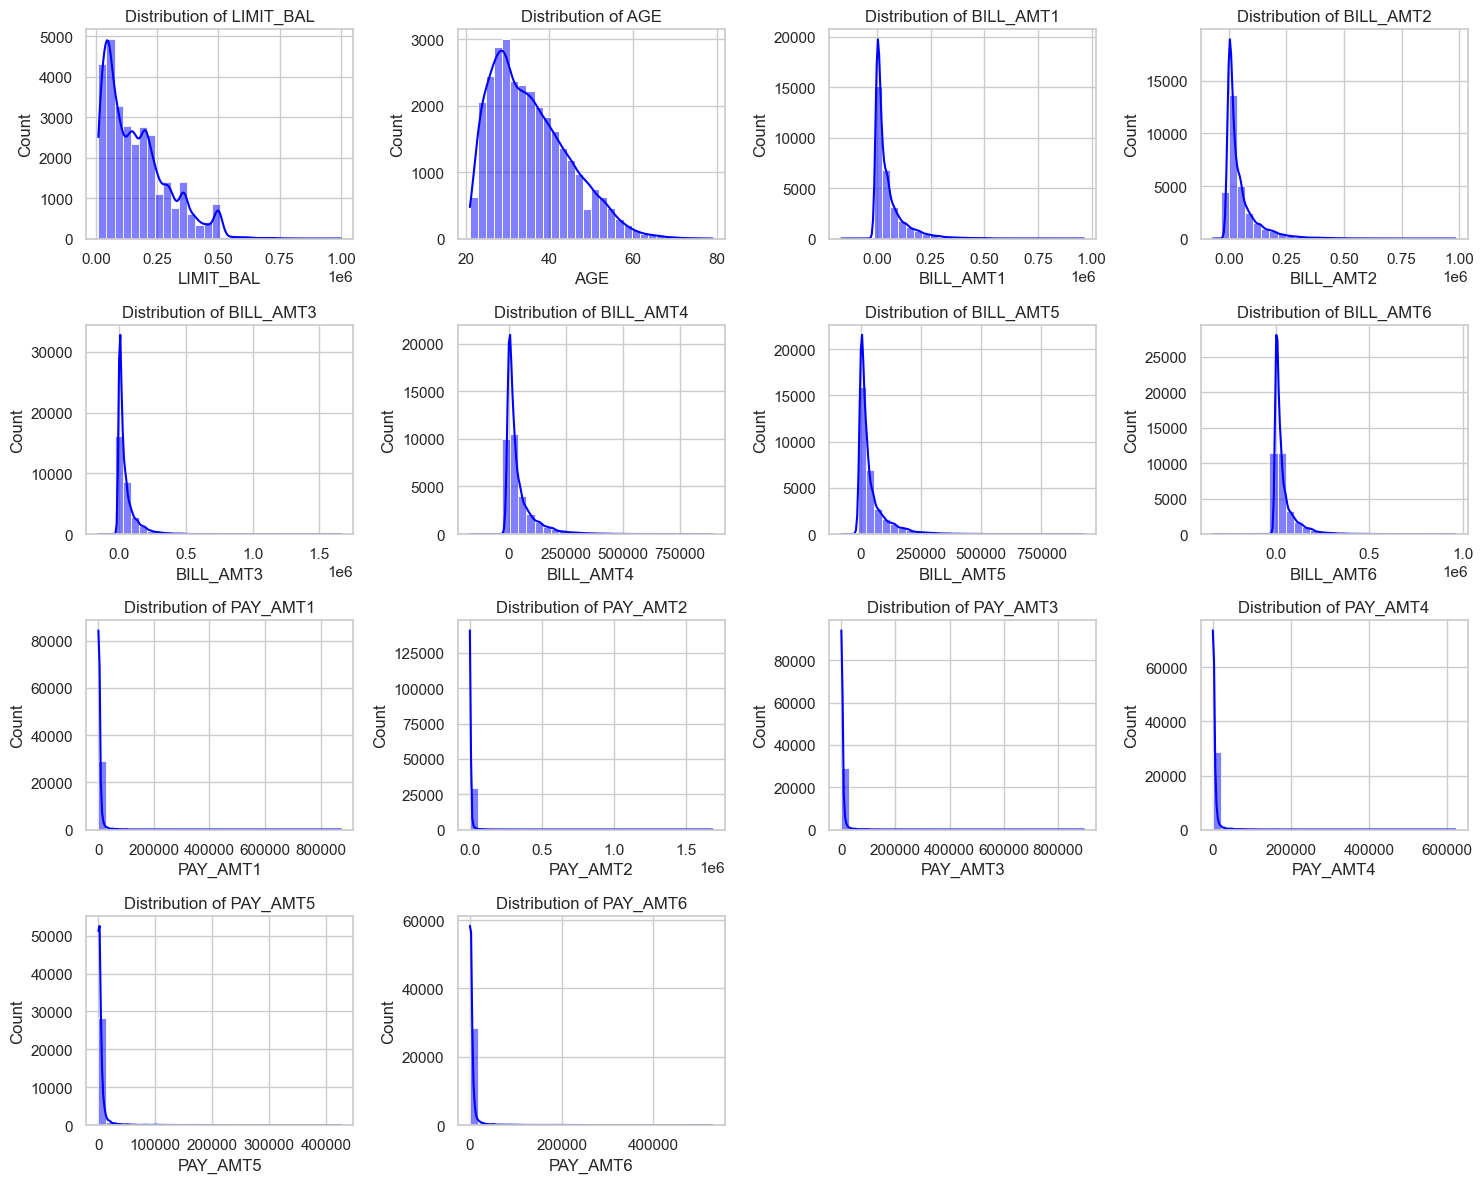

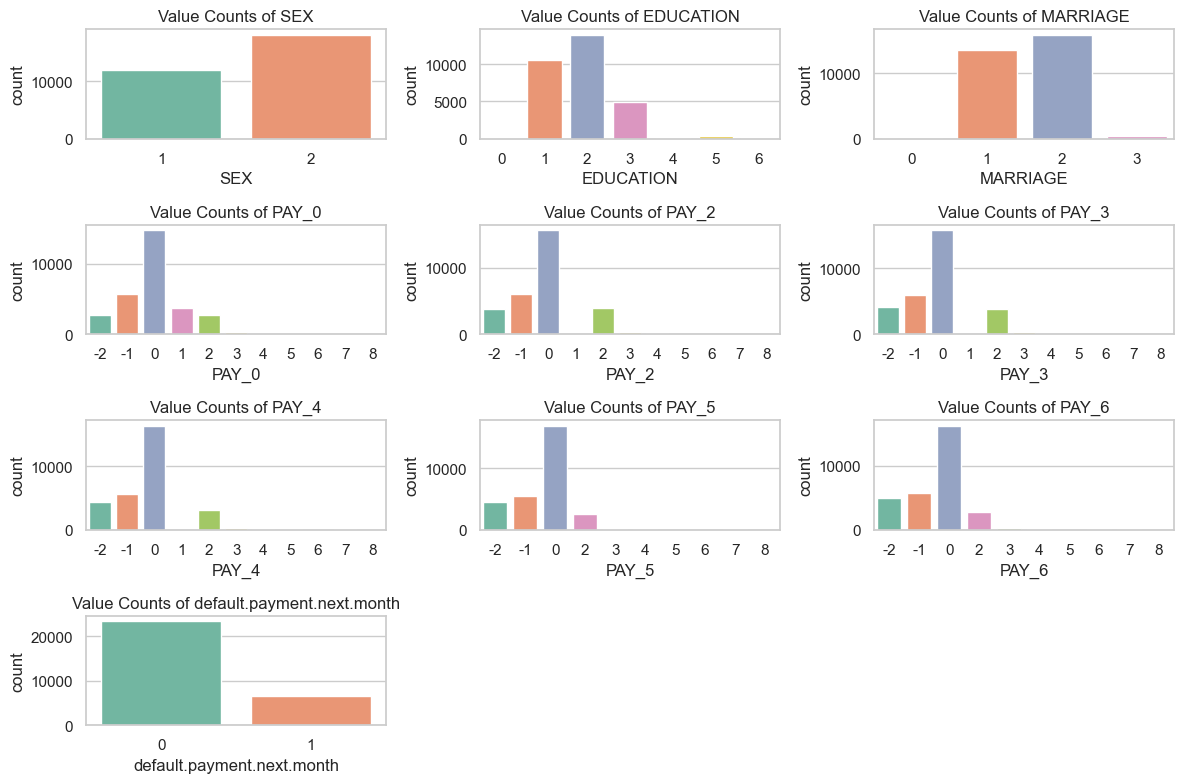

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot Histograms for Numerical Columns
numerical_columns = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Create a figure with subplots
plt.figure(figsize=(15, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

# Plot Bar Charts for Categorical Columns
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month']

# Create a figure for the bar plots
plt.figure(figsize=(12, 8))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=df[column], palette='Set2')
    plt.title(f'Value Counts of {column}')
    plt.tight_layout()

plt.show()


# Lets Pre-Process the data and fit 3 basic models: LogisticRegression, RandomForest and XGBoost and evaluate the Results

In [8]:
# Step 1: Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Separate features and target variable
X = df.drop(columns=['default.payment.next.month', 'ID'])  # Drop target and ID columns
y = df['default.payment.next.month']  # Target variable

# Handle missing values (if any)
imputer = SimpleImputer(strategy='most_frequent')  # Use most frequent value for imputation
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Encode categorical variables
# For categorical columns, we'll use LabelEncoder (since the number of categories is small)
label_encoder = LabelEncoder()

categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in categorical_columns:
    X_imputed[col] = label_encoder.fit_transform(X_imputed[col])

# Step 1.1: Standardize numerical columns
scaler = StandardScaler()
numerical_columns = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

X_imputed[numerical_columns] = scaler.fit_transform(X_imputed[numerical_columns])

# Step 2: Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 3: Train and evaluate the models

# Importing necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Initialize models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Step 4: Evaluate models
models = {'Logistic Regression': logreg, 'Random Forest': rf, 'XGBoost': xgboost}
for model_name, model in models.items():
    print(f"Model: {model_name}")
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Classification Report (Precision, Recall, F1-score)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    



Model: Logistic Regression
Accuracy: 0.8085
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.68      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

Model: Random Forest
Accuracy: 0.8160
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Model: XGBoost
Accuracy: 0.8167
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.38      0.47      1313


# Lets Try Hyperparameter Tuning using Bayesian Optimisation and GridSearch

# Optimising LogReg and handling ClassImbalance

In [11]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight

# 1. Handle class imbalance by using class weights
# Compute class weights automatically based on the training data
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weight_dict = dict(zip([0, 1], class_weights))

# 2. Hyperparameter tuning using GridSearchCV
# Define the Logistic Regression model
log_reg = LogisticRegression(class_weight=class_weight_dict)

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Regularization type
    'solver': ['liblinear', 'lbfgs']  # Solvers to try
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)  # Use X_train and y_train, not X_train_scaled

# 3. Evaluate the best model found by GridSearch
best_log_reg = grid_search.best_estimator_

# Predict on the test set
y_pred = best_log_reg.predict(X_test)  # Use X_test for prediction, not X_test_scaled

# Print the best hyperparameters and model performance
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.7072
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      4687
           1       0.39      0.63      0.49      1313

    accuracy                           0.71      6000
   macro avg       0.64      0.68      0.64      6000
weighted avg       0.77      0.71      0.73      6000



In [12]:
# Get predicted probabilities
y_prob = best_log_reg.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (defaulters)

# Set a custom threshold, e.g., 0.3 instead of 0.5
threshold = 0.49
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Evaluate the model with the adjusted threshold
print(f"Accuracy for threshold {threshold}: {accuracy_score(y_test, y_pred_adjusted):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))


Accuracy for threshold 0.49: 0.6872
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      4687
           1       0.38      0.66      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.69      0.71      6000



# Tuning the RandomForest Model

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1 (defaulters)

# Accuracy and Classification Report
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.8158333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.65      0.34      0.45      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print(f"Best Hyperparameters: {grid_search_rf.best_params_}")

# Get the best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Make predictions with the best model
y_pred_rf_best = best_rf_model.predict(X_test_scaled)
y_prob_rf_best = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Accuracy and Classification Report for the best model
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_best)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8128333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      4687
           1       0.61      0.39      0.48      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.79      0.81      0.80      6000



In [16]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Assuming the best Random Forest model (best_rf_model) is available after GridSearchCV
# and the scaled test set is X_test_scaled and y_test

# Get predicted probabilities for class 1 (defaulters)
y_pred_prob_rf_best = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Function to adjust threshold and get metrics
def evaluate_threshold(y_true, y_pred_prob, threshold):
    # Adjust predictions based on the threshold
    y_pred_adjusted = (y_pred_prob >= threshold).astype(int)
    
    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_true, y_pred_adjusted)
    class_report = classification_report(y_true, y_pred_adjusted)
    
    return accuracy, class_report

# Set the threshold and evaluate
threshold = float(input("Enter threshold (0 to 1): "))  # Example: 0.3, 0.4, etc.
accuracy, class_report = evaluate_threshold(y_test, y_pred_prob_rf_best, threshold)

# Print the results
print(f"Accuracy for threshold {threshold}: {accuracy}")
print("Classification Report:")
print(class_report)


Enter threshold (0 to 1):  0.25


Accuracy for threshold 0.25: 0.7276666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      4687
           1       0.42      0.65      0.51      1313

    accuracy                           0.73      6000
   macro avg       0.65      0.70      0.66      6000
weighted avg       0.78      0.73      0.75      6000



# Tuning the XGBoost Model

In [18]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# 1. Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 7, 10],       # Depth of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinking
    'subsample': [0.8, 0.9, 1.0],      # Fraction of samples used per tree
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used per tree
    'gamma': [0, 0.1, 0.2]  # Regularization term
}

# 2. Initialize XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)

# 3. Perform Grid Search with cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train_scaled, y_train)

# 4. Print the best hyperparameters
print(f"Best Hyperparameters for XGBoost: {grid_search_xgb.best_params_}")

# 5. Get the best model from GridSearchCV
best_xgb_model = grid_search_xgb.best_estimator_

# 6. Make predictions with the best model
y_pred_xgb_best = best_xgb_model.predict(X_test_scaled)

# 7. Accuracy and Classification Report for the best model
accuracy = accuracy_score(y_test, y_pred_xgb_best)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_best))


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Hyperparameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Accuracy: 0.8201666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [19]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Get predicted probabilities for class 1 (positive class)
y_prob_xgb_best = best_xgb_model.predict_proba(X_test_scaled)[:, 1]

# Ask for threshold input
threshold = float(input("Enter threshold (0 to 1): "))

# Adjust predictions based on the threshold
y_pred_adjusted = (y_prob_xgb_best >= threshold).astype(int)

# Calculate and display the metrics for the adjusted threshold
accuracy = accuracy_score(y_test, y_pred_adjusted)
print(f"Accuracy for threshold {threshold}: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))


Enter threshold (0 to 1):  0.29


Accuracy for threshold 0.29: 0.8003333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4687
           1       0.54      0.55      0.55      1313

    accuracy                           0.80      6000
   macro avg       0.71      0.71      0.71      6000
weighted avg       0.80      0.80      0.80      6000



# Final Conclusion:

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import joblib

# Assuming 'best_rf_model' is the final trained RandomForest model
# and X_test_scaled, y_test are your test datasets

# 1. Generate Confusion Matrix
y_pred_rf = best_rf_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_rf)

# Plotting the Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_rf.png')
plt.close()

# 2. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_rf_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('roc_auc_rf.png')
plt.close()



In [22]:
# 3. Model Card in Markdown format
model_card = """
# Random Forest Model Card

## Model Description
This model is a Random Forest Classifier used to predict whether a customer will default on a loan. The model was trained on a dataset with features related to financial information and customer behavior. It was tuned using GridSearchCV to find the best hyperparameters and mitigate class imbalance by applying class weights.

## Model Evaluation

- **Accuracy**: 0.73 (with threshold adjustment of 0.25)
- **Precision**: 0.42 for Default, 0.88 for No Default
- **Recall**: 0.65 for Default, 0.75 for No Default
- **F1-Score**: 0.51 for Default, 0.81 for No Default

## Confusion Matrix
The confusion matrix below shows the model's performance on the test set:

![Confusion Matrix](confusion_matrix_rf.png)

## ROC Curve
The ROC curve demonstrates the model's ability to distinguish between classes (Default vs. No Default). The area under the curve (AUC) is an important metric for evaluating the model's discriminative power.

![ROC Curve](roc_auc_rf.png)

## Hyperparameters
- `n_estimators`: 200
- `max_depth`: None
- `min_samples_split`: 5
- `min_samples_leaf`: 1
- `class_weight`: 'balanced'

## Usage
To use this model for predictions, you can load it with the following code:

```python
import joblib
# Load the trained model
rf_model = joblib.load('best_rf_model.pkl')

# Make predictions
y_pred = rf_model.predict(X_test_scaled)
#Model License
This model is provided for educational and research purposes. It should not be used in production environments without further validation and testing.

"""

#Save the model card to a markdown file
with open('model_card_rf.md', 'w') as f: f.write(model_card)

#4. Save the Random Forest model for future use
joblib.dump(best_rf_model, 'best_rf_model.pkl')

print("Model Card, Confusion Matrix, ROC Curve, and Model saved successfully!")

Model Card, Confusion Matrix, ROC Curve, and Model saved successfully!
